# Machine Learning

---

## Project: Sentiment Analysis From Audio Recordings

### Project Code File

### Submission by:

---

1. **Awais Ali** (Sp22-BSCS-080) 
2. **Muhammad Qasim** (Sp22-BSCS-048)
3. **Sohaib Ahmad** (Sp22-BSCS-060)
4. **Hammad Ahmad** (Sp22-BSCS-063)

---


#### Dataset Description
> CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). The actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral and Sad) and four different emotion levels (Low, Medium, High and Unspecified).

##### Link: 
https://github.com/Now33d/SentimentAnalysisDataset

#### Library Imports for Audio Data Processing and Visualization
> This code imports essential libraries required for handling, processing, visualizing, and analyzing audio data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from glob import glob

import librosa
import librosa.display
import librosa.feature
import IPython.display as ipd
import scipy.signal 
import soundfile as sf

#### Audio File and Label Matching
> This code defines paths for audio files and labels, loads a CSV of label data, normalizes filenames for consistency, and checks if each audio file has a corresponding label in the dataset.

In [3]:
# Define paths
audio_recordings_path = r"C:\Users\Qasim\OneDrive\Desktop\Machine Learning Project\SentimentAnalysisDataset-main\SentimentAnalysisDataset-main\\NoiseAudioWAV"
audio_recordings = glob(r"C:\Users\Qasim\OneDrive\Desktop\Machine Learning Project\SentimentAnalysisDataset-main\SentimentAnalysisDataset-main\\NoiseAudioWAV\*.wav")
labels_csv_path = r"C:\Users\Qasim\OneDrive\Desktop\Machine Learning Project\SentimentAnalysisDataset-main\SentimentAnalysisDataset-main\SentenceFilenames.csv"

# Load the CSV without headers
labels_df = pd.read_csv(labels_csv_path, header=None, names=["Index", "Filename"])

# Normalize filenames in the CSV
labels_df['Filename'] = labels_df['Filename'].str.strip().str.lower()
#print(labels_df.head())  # Preview loaded CSV data
#print(filename)  # Check extracted filenames
labels_df['Filename'] += ".wav"  # Add '.wav' extension if missing


# Print list of audio files with their corresponding labels
print("List of audio files with labels:")
for file in audio_recordings:
    # Extract and normalize the filename
    filename = os.path.basename(file).lower()  # Get the base filename and convert to lowercase
    label_row = labels_df[labels_df['Filename'] == filename]  # Filter the row with the matching filename
    
    if not label_row.empty:
        print(f"{filename} -> Found in CSV")
    else:
        print(f"{filename} -> Label: Not Found in CSV")


List of audio files with labels:
1001_dfa_ang_xx.wav -> Found in CSV
1001_dfa_dis_xx.wav -> Found in CSV
1001_dfa_fea_xx.wav -> Found in CSV
1001_dfa_hap_xx.wav -> Found in CSV
1001_dfa_neu_xx.wav -> Found in CSV
1001_dfa_sad_xx.wav -> Found in CSV
1001_ieo_ang_hi.wav -> Found in CSV
1001_ieo_ang_lo.wav -> Found in CSV
1001_ieo_ang_md.wav -> Found in CSV
1001_ieo_dis_hi.wav -> Found in CSV
1001_ieo_dis_lo.wav -> Found in CSV
1001_ieo_dis_md.wav -> Found in CSV
1001_ieo_fea_hi.wav -> Found in CSV
1001_ieo_fea_lo.wav -> Found in CSV
1001_ieo_fea_md.wav -> Found in CSV
1001_ieo_hap_hi.wav -> Found in CSV
1001_ieo_hap_lo.wav -> Found in CSV
1001_ieo_hap_md.wav -> Found in CSV
1001_ieo_neu_xx.wav -> Found in CSV
1001_ieo_sad_hi.wav -> Found in CSV
1001_ieo_sad_lo.wav -> Found in CSV
1001_ieo_sad_md.wav -> Found in CSV
1001_iom_ang_xx.wav -> Found in CSV
1001_iom_dis_xx.wav -> Found in CSV
1001_iom_fea_xx.wav -> Found in CSV
1001_iom_hap_xx.wav -> Found in CSV
1001_iom_neu_xx.wav -> Found in

#### Play Audio File  
> This code plays the fifth audio file from the list of audio recordings using IPython's `Audio` class for inline audio playback.

In [5]:
ipd.Audio(audio_recordings[4])

#### Labeling Conventions

1. **Actor ID:** A 4-digit number at the start of the file. Each identifier is separated by an underscore (_).

2. **Sentences:** Actors spoke from 12 predefined sentences, each with a three-letter acronym in the filename:
   - It's eleven o'clock (**IEO**)
   - That is exactly what happened (**TIE**)
   - I'm on my way to the meeting (**IOM**)
   - I wonder what this is about (**IWW**)
   - The airplane is almost full (**TAI**)
   - Maybe tomorrow it will be cold (**MTI**)
   - I would like a new alarm clock (**IWL**)
   - I think I have a doctor's appointment (**ITH**)
   - Don't forget a jacket (**DFA**)
   - I think I've seen this before (**ITS**)
   - The surface is slick (**TSI**)
   - We'll stop in a couple of minutes (**WSI**)

3. **Emotions:** Sentences were expressed with emotions (three-letter codes):
   - Anger (**ANG**), Disgust (**DIS**), Fear (**FEA**), Happy/Joy (**HAP**), Neutral (**NEU**), Sad (**SAD**)

   **Emotion Level** (two-letter codes):
   - Low (**LO**), Medium (**MD**), High (**HI**), Unspecified (**XX**)

In [7]:
df = pd.read_csv(labels_csv_path)

# Function to extract details from the filename
def parse_filename(Filename):
    # Split the filename into parts
    parts = Filename.split('_')
    
    # Extract Actor ID (4-digit number at the start)
    actor_id = parts[0]
    
    # Sentence (3-letter acronym)
    sentence_code = parts[1].upper()
    sentence_mapping = {
        "IEO": "It's eleven o'clock",
        "TIE": "That is exactly what happened",
        "IOM": "I'm on my way to the meeting",
        "IWW": "I wonder what this is about",
        "TAI": "The airplane is almost full",
        "MTI": "Maybe tomorrow it will be cold",
        "IWL": "I would like a new alarm clock",
        "ITH": "I think I have a doctor's appointment",
        "DFA": "Don't forget a jacket",
        "ITS": "I think I've seen this before",
        "TSI": "The surface is slick",
        "WSI": "We'll stop in a couple of minutes"
    }
    sentence = sentence_mapping.get(sentence_code, "Unknown Sentence")
    
    # Emotion (3-letter code)
    emotion_code = parts[2].upper()
    emotion_mapping = {
        "ANG": "Anger",
        "DIS": "Disgust",
        "FEA": "Fear",
        "HAP": "Happy/Joy",
        "NEU": "Neutral",
        "SAD": "Sad"
    }
    emotion = emotion_mapping.get(emotion_code, "Unknown Emotion")
    
    # Emotion Level (2-letter code)
    emotion_level_code = parts[3].split('.')[0].upper()  # Removing the extension
    emotion_level_mapping = {
        "LO": "Low",
        "MD": "Medium",
        "HI": "High",
        "XX": "Unspecified"
    }
    emotion_level = emotion_level_mapping.get(emotion_level_code, "Unknown Level")
    
    return actor_id, sentence, emotion, emotion_level

# Apply the function to extract details and create new columns
df[['Actor ID', 'Sentence', 'Emotion', 'Emotion Level']] = df['Filename'].apply(
    lambda x: pd.Series(parse_filename(x))
)

# Save the processed DataFrame to a new CSV file
output_csv_file = "processed_data.csv"
df.to_csv(output_csv_file, index=False)

print(f"Processed DataFrame saved to {output_csv_file}")
df.head(100)

Processed DataFrame saved to processed_data.csv


,Stimulus_Number,Filename,Actor ID,Sentence,Emotion,Emotion Level
0,1,1001_IEO_NEU_XX,1001,It's eleven o'clock,Neutral,Unspecified
1,2,1001_IEO_HAP_LO,1001,It's eleven o'clock,Happy/Joy,Low
2,3,1001_IEO_HAP_MD,1001,It's eleven o'clock,Happy/Joy,Medium
3,4,1001_IEO_HAP_HI,1001,It's eleven o'clock,Happy/Joy,High
4,5,1001_IEO_SAD_LO,1001,It's eleven o'clock,Sad,Low
...,...,...,...,...,...,...
95,96,1002_IEO_DIS_LO,1002,It's eleven o'clock,Disgust,Low
96,97,1002_IEO_DIS_MD,1002,It's eleven o'clock,Disgust,Medium
97,98,1002_IEO_DIS_HI,1002,It's eleven o'clock,Disgust,High
98,99,1002_TIE_HAP_XX,1002,That is exactly what happened,Happy/Joy,Unspecified


#### Extract and Analyze Emotions from Filenames  
> This code extracts emotions from filenames by parsing specific parts, filters out invalid entries, and displays the count of unique emotions in the dataset.

In [19]:
# Ensure filenames in the DataFrame are in lowercase
labels_df['Filename'] = labels_df['Filename'].str.strip().str.lower()

# Function to extract emotion from lowercase filenames
def extract_emotion(filename):
    parts = filename.split('_')  # Split filename by '_'
    if len(parts) > 2:  # Ensure there are at least 3 parts
        return parts[2]  # Return the third part as emotion
    else:
        return None  # Return None for invalid filenames

# Apply the function to extract emotions
labels_df['Emotion'] = labels_df['Filename'].apply(extract_emotion)

# Drop rows with invalid filenames (if needed)
labels_df = labels_df.dropna(subset=['Emotion'])

# Display unique emotions and their counts
emotion_counts = labels_df['Emotion'].value_counts()

print("Emotion counts in the dataset:")
print(emotion_counts)


Emotion counts in the dataset:
Emotion
hap    1271
sad    1271
ang    1271
fea    1271
dis    1271
neu    1087
Name: count, dtype: int64


#### Dataset Split and Save
> The code loads metadata, splits it into training, validation, and test sets, and saves the splits as separate CSV files.


In [21]:
from sklearn.model_selection import train_test_split

# Step 1: Define the metadata file path
METADATA_FILE = os.path.join(audio_recordings_path, r"C:\Users\Qasim\OneDrive\Desktop\Machine Learning Project\processed_data.csv")  # Combines the directory path with the metadata file name

# Step 2: Load metadata
metadata = pd.read_csv(METADATA_FILE)

# Display the first few rows of metadata
print("Metadata Preview:")
print(metadata.head())

# Step 3: Ensure metadata contains all required columns
# Check that essential columns are present (e.g., 'Filename', 'Emotion')
required_columns = ['Filename', 'Emotion']
if not all(col in metadata.columns for col in required_columns):
    raise ValueError(f"Metadata file must contain the following columns: {required_columns}")

# Step 4: Perform train-validation-test split
# Splitting 70% Train, 15% Validation, 15% Test
train_data, temp_data = train_test_split(
    metadata, 
    test_size=0.30, 
    stratify=metadata['Emotion'], 
    random_state=42
)
val_data, test_data = train_test_split(
    temp_data, 
    test_size=0.50, 
    stratify=temp_data['Emotion'], 
    random_state=42
)

# Step 5: Verify split distributions
print("\nSplit distributions:")
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

# Step 6: Save splits as CSV files
train_data.to_csv(os.path.join(audio_recordings_path, "train_metadata.csv"), index=False)
val_data.to_csv(os.path.join(audio_recordings_path, "val_metadata.csv"), index=False)
test_data.to_csv(os.path.join(audio_recordings_path, "test_metadata.csv"), index=False)

print("\nMetadata splits saved as 'train_metadata.csv', 'val_metadata.csv', and 'test_metadata.csv' in the specified directory.")


Metadata Preview:
   Stimulus_Number         Filename  Actor ID             Sentence    Emotion  \
0                1  1001_IEO_NEU_XX      1001  It's eleven o'clock    Neutral   
1                2  1001_IEO_HAP_LO      1001  It's eleven o'clock  Happy/Joy   
2                3  1001_IEO_HAP_MD      1001  It's eleven o'clock  Happy/Joy   
3                4  1001_IEO_HAP_HI      1001  It's eleven o'clock  Happy/Joy   
4                5  1001_IEO_SAD_LO      1001  It's eleven o'clock        Sad   

  Emotion Level  
0   Unspecified  
1           Low  
2        Medium  
3          High  
4           Low  

Split distributions:
Training set size: 5209
Validation set size: 1116
Test set size: 1117

Metadata splits saved as 'train_metadata.csv', 'val_metadata.csv', and 'test_metadata.csv' in the specified directory.


#### Apply Butterworth Low-Pass Filter and Save Processed Audio
> The code applies a low-pass Butterworth filter to audio files from the metadata splits and saves the filtered audio to separate folders for each split.



Processing train data...


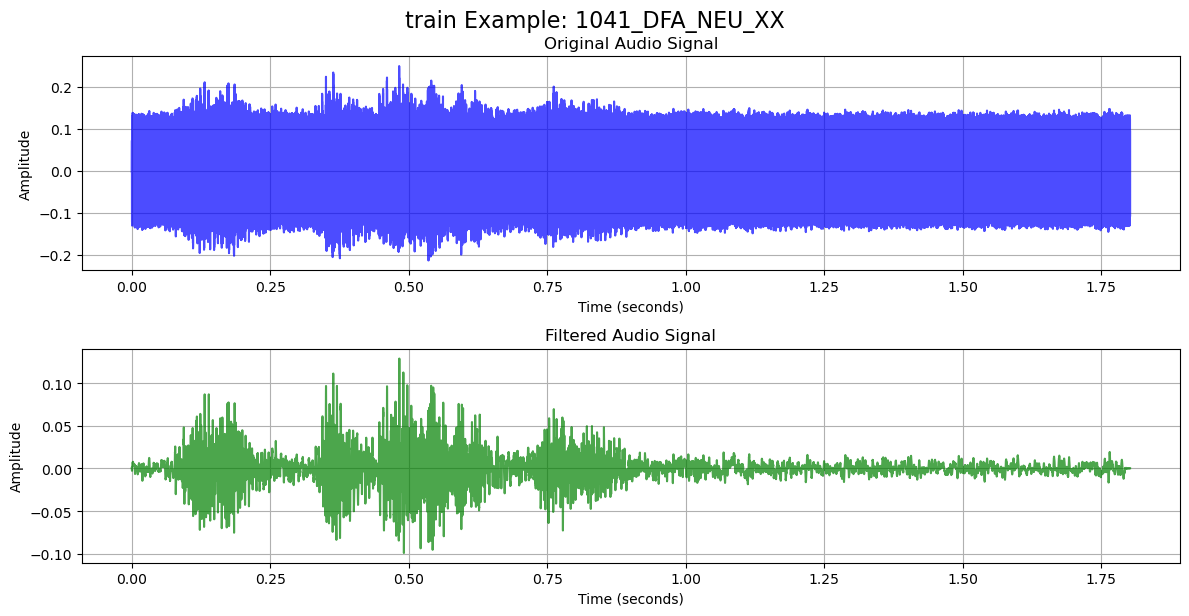


Processing validation data...


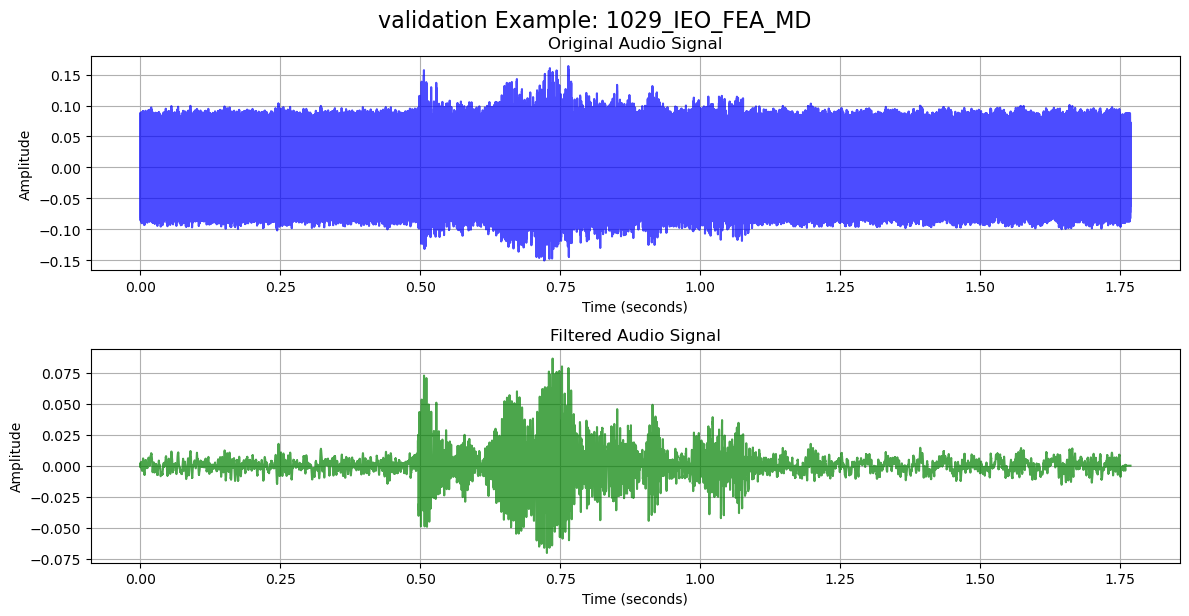


Processing test data...


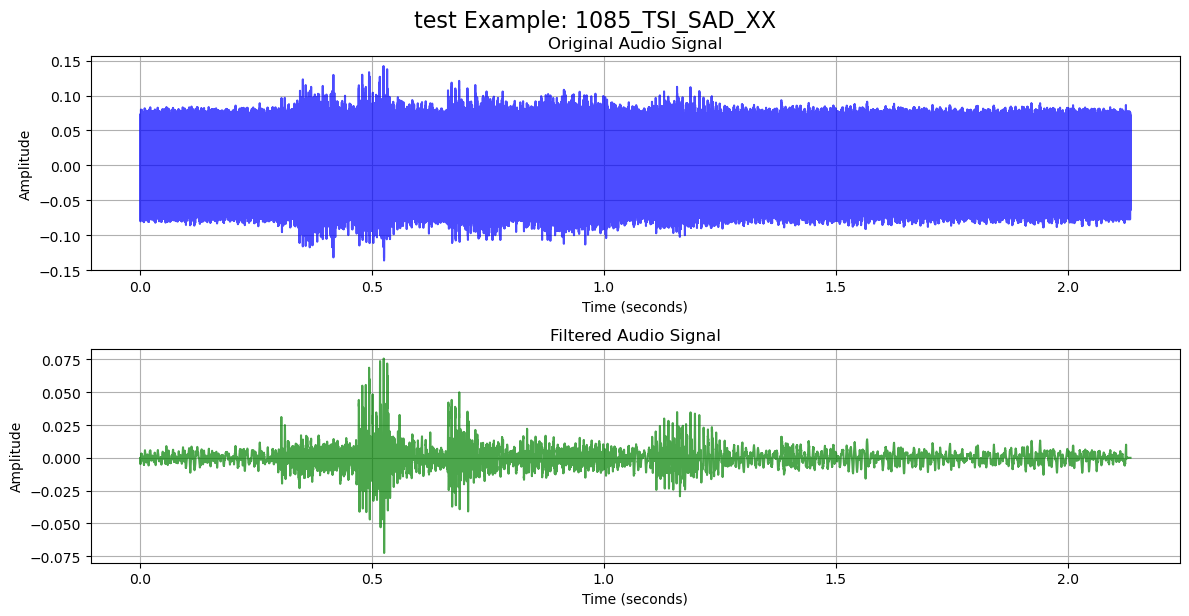

In [23]:
from scipy.signal import butter, lfilter

# Step 1: Define paths
METADATA_FILE = os.path.join(audio_recordings_path, r"C:\Users\Qasim\OneDrive\Desktop\Machine Learning Project\processed_data.csv")
metadata = pd.read_csv(METADATA_FILE)

# Ensure all files exist
metadata['FullPath'] = metadata['Filename'].apply(lambda x: os.path.join(audio_recordings_path, x + ".wav"))  # Assuming .wav extension
metadata = metadata[metadata['FullPath'].apply(os.path.exists)]

# Save metadata without missing files (optional)
metadata.drop(columns=['FullPath'], inplace=True)
metadata.to_csv(METADATA_FILE, index=False)

# Step 2: Define Butterworth low-pass filter function
def butter_lowpass_filter(data, cutoff, sr, order=5):
    nyquist = 0.5 * sr
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype="low", analog=False)
    return lfilter(b, a, data)

def plot_audio_signals(original_audio, filtered_audio, sr, title="Audio Signals"):
    """
    Plots the waveforms of the original and filtered audio signals.

    Parameters:
        original_audio (numpy array): The original audio signal.
        filtered_audio (numpy array): The filtered audio signal.
        sr (int): Sampling rate of the audio.
        title (str): Title of the plot.
    """
    time = np.linspace(0, len(original_audio) / sr, num=len(original_audio))

    plt.figure(figsize=(12, 6))
    
    # Plot original audio
    plt.subplot(2, 1, 1)
    plt.plot(time, original_audio, label="Original Audio", color="blue", alpha=0.7)
    plt.title("Original Audio Signal")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    # Plot filtered audio
    plt.subplot(2, 1, 2)
    plt.plot(time, filtered_audio, label="Filtered Audio", color="green", alpha=0.7)
    plt.title("Filtered Audio Signal")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.grid(True)

    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()


def apply_filter_and_save(metadata, split_name, cutoff=3400, sr=16000):
    print(f"\nProcessing {split_name} data...")
    # Create output folder for filtered audio if not exists
    output_folder = os.path.join(audio_recordings_path, f"{split_name}_filtered")
    os.makedirs(output_folder, exist_ok=True)

    for index, row in metadata.iterrows():
        file_path = os.path.join(audio_recordings_path, row['Filename'] + ".wav")  # Assuming .wav extension
        try:
            original_audio, sr = librosa.load(file_path, sr=sr)
            filtered_audio = butter_lowpass_filter(original_audio, cutoff, sr)

            # Save the filtered audio to a separate folder
            filtered_file_path = os.path.join(output_folder, row['Filename'] + "_filtered.wav")
            sf.write(filtered_file_path, filtered_audio, sr)  # Use soundfile.write
            
            # Plot the first file for visualization
            if index == 0:
                plot_audio_signals(original_audio, filtered_audio, sr, title=f"{split_name} Example: {row['Filename']}")
            
        except FileNotFoundError:
            print(f"File not found: {file_path}")
            continue

# Step 4: Split and process datasets
# Assuming you already have the splits saved as CSV
train_data = pd.read_csv(os.path.join(audio_recordings_path, "train_metadata.csv"))
val_data = pd.read_csv(os.path.join(audio_recordings_path, "val_metadata.csv"))
test_data = pd.read_csv(os.path.join(audio_recordings_path, "test_metadata.csv"))

# Apply filter and save filtered files for each split
apply_filter_and_save(train_data, "train")
apply_filter_and_save(val_data, "validation")
apply_filter_and_save(test_data, "test")


#### Extract Audio Features and Apply PCA for Dimensionality Reduction
> The code extracts various audio features (MFCC, chroma, mel spectrogram, spectral features) from filtered audio files and applies PCA to reduce the dimensionality while retaining 95% of the variance.


In [17]:
# Step 1: Define paths for the filtered audio data and metadata
audio_recordings_path = r"C:\Users\Qasim\OneDrive\Desktop\Machine Learning Project\SentimentAnalysisDataset-main\SentimentAnalysisDataset-main\NoiseAudioWAV"

# Metadata files for each split
train_metadata_file = os.path.join(audio_recordings_path, "train_metadata.csv")
val_metadata_file = os.path.join(audio_recordings_path, "val_metadata.csv")
test_metadata_file = os.path.join(audio_recordings_path, "test_metadata.csv")

# Load metadata for each split
train_metadata = pd.read_csv(train_metadata_file)
val_metadata = pd.read_csv(val_metadata_file)
test_metadata = pd.read_csv(test_metadata_file)

# Step 2: Feature extraction - Extract MFCCs and additional features from filtered audio files
def extract_audio_features(audio_path, sr=16000, n_mfcc=13):
    try:
        # Load the filtered audio file
        audio, sr = librosa.load(audio_path, sr=sr)
        
        # Extract MFCCs
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        
        # Extract chroma
        chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
        
        # Extract mel spectrogram
        mel = librosa.feature.melspectrogram(y=audio, sr=sr)
        
        # Spectral features
        spec_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spec_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)
        spec_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        spec_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
        spec_flatness = librosa.feature.spectral_flatness(y=audio)
        
        # Return features in a dictionary to maintain naming consistency
        return {
            "mfcc": mfcc,
            "chroma": chroma,
            "mel": mel,
            "spec_centroid": spec_centroid,
            "spec_contrast": spec_contrast,
            "spec_bandwidth": spec_bandwidth,
            "spec_rolloff": spec_rolloff,
            "spec_flatness": spec_flatness
        }
    except FileNotFoundError:
        print(f"File not found: {audio_path}")
        return None

# Function to extract features from all audio files in a given metadata dataframe
def extract_features_from_split(metadata, split_name):
    audio_features_list = []
    for index, row in metadata.iterrows():
        audio_path = os.path.join(audio_recordings_path, f"{split_name}_filtered", row['Filename'] + "_filtered.wav")
        features = extract_audio_features(audio_path)
        
        if features is not None:
            audio_features_list.append(features)
            print(f"Features extracted for {row['Filename']} in {split_name} split")
        else:
            print(f"Failed to extract features for {row['Filename']} in {split_name} split")
    
    return audio_features_list

# Step 3: Extract features for each split (train, validation, test)
print("\nExtracting features for the train split...")
train_audio_features = extract_features_from_split(train_metadata, "train")

print("\nExtracting features for the validation split...")
val_audio_features = extract_features_from_split(val_metadata, "validation")

print("\nExtracting features for the test split...")
test_audio_features = extract_features_from_split(test_metadata, "test")

# Flatten the feature arrays for dimensionality reduction
def flatten_features(features_list):
    flattened_features = []
    for features in features_list:
        flattened_features.append(np.concatenate([f.flatten() for f in features.values()]))
    return np.array(flattened_features)

X_train = flatten_features(train_audio_features)
X_val = flatten_features(val_audio_features)
X_test = flatten_features(test_audio_features)

# Step 4: Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_val after PCA: {X_val_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")


Extracting features for the train split...
Features extracted for 1041_DFA_NEU_XX in train split
Features extracted for 1038_ITS_NEU_XX in train split
Features extracted for 1033_IEO_ANG_HI in train split
Features extracted for 1016_IEO_HAP_MD in train split
Features extracted for 1055_TAI_SAD_XX in train split
Features extracted for 1024_TSI_ANG_XX in train split
Features extracted for 1080_TSI_NEU_XX in train split
Features extracted for 1053_MTI_SAD_XX in train split
Features extracted for 1037_IWL_DIS_XX in train split
Features extracted for 1066_TSI_HAP_XX in train split
Features extracted for 1022_ITH_SAD_XX in train split
Features extracted for 1028_TAI_SAD_XX in train split
Features extracted for 1004_IWL_NEU_XX in train split
Features extracted for 1018_TSI_HAP_XX in train split
Features extracted for 1006_ITH_ANG_XX in train split
Features extracted for 1086_WSI_SAD_XX in train split
Features extracted for 1049_IEO_DIS_LO in train split
Features extracted for 1017_TIE_SAD_XX

C:\Users\Qasim\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Features extracted for 1063_TSI_FEA_XX in train split
Features extracted for 1075_TAI_NEU_XX in train split
Features extracted for 1023_TSI_HAP_XX in train split
Features extracted for 1001_TIE_FEA_XX in train split
Features extracted for 1077_IWW_SAD_XX in train split
Features extracted for 1026_WSI_DIS_XX in train split
Features extracted for 1076_WSI_FEA_XX in train split
Features extracted for 1061_IWL_ANG_XX in train split
Features extracted for 1076_ITS_DIS_XX in train split
Features extracted for 1053_ITH_HAP_XX in train split
Features extracted for 1032_ITS_DIS_XX in train split
Features extracted for 1076_IWL_SAD_XX in train split
Features extracted for 1012_IEO_SAD_HI in train split
Features extracted for 1069_DFA_SAD_XX in train split
Features extracted for 1049_IWW_ANG_XX in train split
Features extracted for 1059_TIE_SAD_XX in train split
Features extracted for 1034_ITS_NEU_XX in train split
Features extracted for 1062_IWL_SAD_XX in train split
Features extracted for 1041_

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5209,) + inhomogeneous part.

#### Optional

C:\Users\Qasim\anaconda3\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


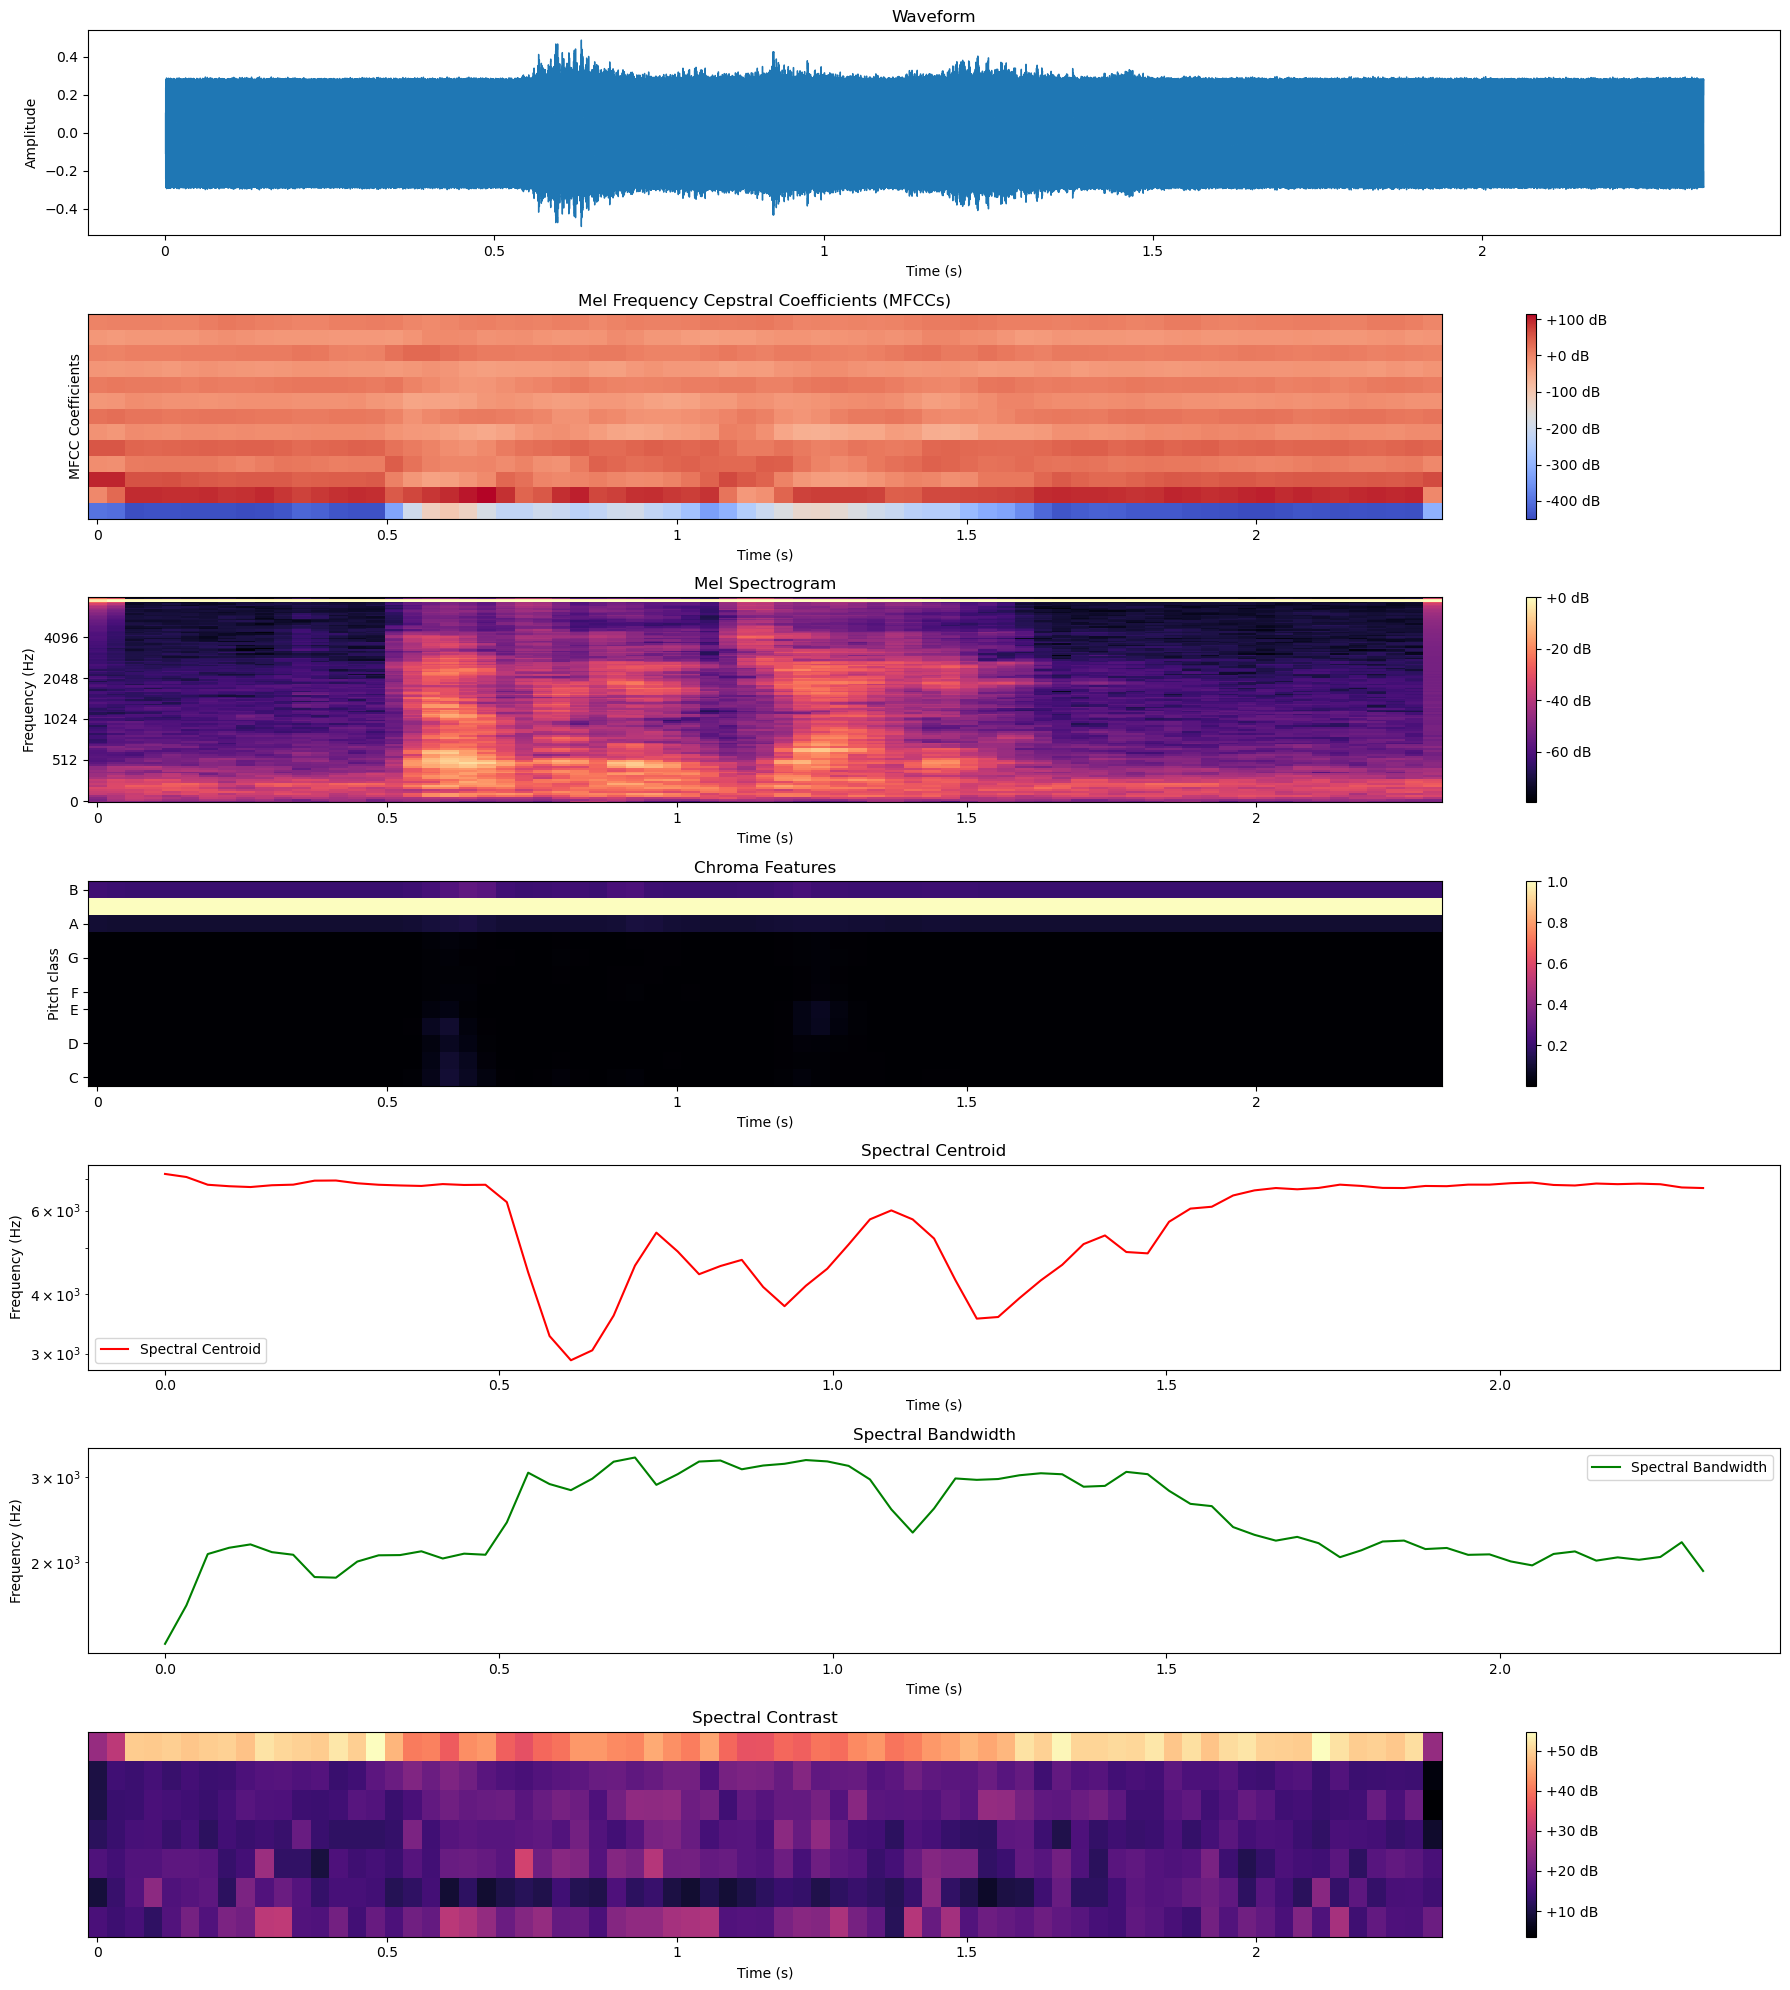

In [11]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

# Visualization of features for a single audio file
def visualize_feature_extraction(audio_path, sr=16000, n_mfcc=13):
    try:
        # Load the audio file
        audio, sr = librosa.load(audio_path, sr=sr)
        duration = len(audio) / sr

        # Compute features
        mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
        mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
        chroma_features = librosa.feature.chroma_stft(y=audio, sr=sr)
        spectral_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

        # Visualization
        plt.figure(figsize=(18, 20))

        # 1. Waveform
        plt.subplot(7, 1, 1)
        librosa.display.waveshow(audio, sr=sr)
        plt.title("Waveform")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")

        # 2. MFCCs
        plt.subplot(7, 1, 2)
        librosa.display.specshow(mfccs, x_axis='time', sr=sr)
        plt.title("Mel Frequency Cepstral Coefficients (MFCCs)")
        plt.colorbar(format='%+2.0f dB')
        plt.xlabel("Time (s)")
        plt.ylabel("MFCC Coefficients")

        # 3. Mel Spectrogram
        plt.subplot(7, 1, 3)
        librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), x_axis='time', y_axis='mel', sr=sr)
        plt.title("Mel Spectrogram")
        plt.colorbar(format='%+2.0f dB')
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")

        # 4. Chroma Features
        plt.subplot(7, 1, 4)
        librosa.display.specshow(chroma_features, x_axis='time', y_axis='chroma', sr=sr)
        plt.title("Chroma Features")
        plt.colorbar()
        plt.xlabel("Time (s)")

        # 5. Spectral Centroid
        plt.subplot(7, 1, 5)
        frames = np.arange(spectral_centroid.shape[1])
        times = librosa.frames_to_time(frames, sr=sr)
        plt.semilogy(times, spectral_centroid.T, label='Spectral Centroid', color='r')
        plt.title("Spectral Centroid")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.legend()

        # 6. Spectral Bandwidth
        plt.subplot(7, 1, 6)
        plt.semilogy(times, spectral_bandwidth.T, label='Spectral Bandwidth', color='g')
        plt.title("Spectral Bandwidth")
        plt.xlabel("Time (s)")
        plt.ylabel("Frequency (Hz)")
        plt.legend()

        # 7. Spectral Contrast
        plt.subplot(7, 1, 7)
        librosa.display.specshow(spectral_contrast, x_axis='time', sr=sr)
        plt.title("Spectral Contrast")
        plt.colorbar(format='%+2.0f dB')
        plt.xlabel("Time (s)")

        plt.tight_layout()
        plt.show()

    except FileNotFoundError:
        print(f"File not found: {audio_path}")

# Example usage
#example_audio_file = os.path.join(audio_recordings_path, "example.wav")  # Replace with an actual file path
visualize_feature_extraction(audio_recordings[1])


#### Train and Evaluate Classifiers Using RandomizedSearchCV
> The code tunes hyperparameters for multiple classifiers using RandomizedSearchCV, evaluates them on training and test data, and plots accuracy comparisons and confusion matrices for each model.



Tuning hyperparameters for K-Nearest Neighbors...

Tuning hyperparameters for Logistic Regression...

Tuning hyperparameters for Support Vector Machine...

Tuning hyperparameters for Neural Network...

Training K-Nearest Neighbors...


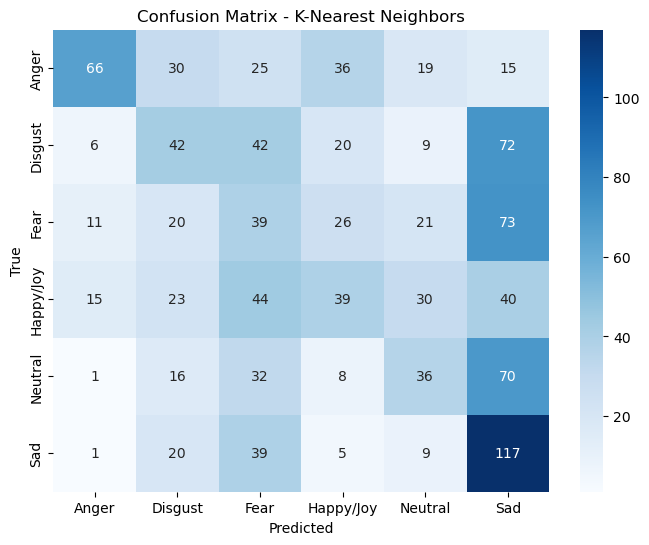


Training Logistic Regression...


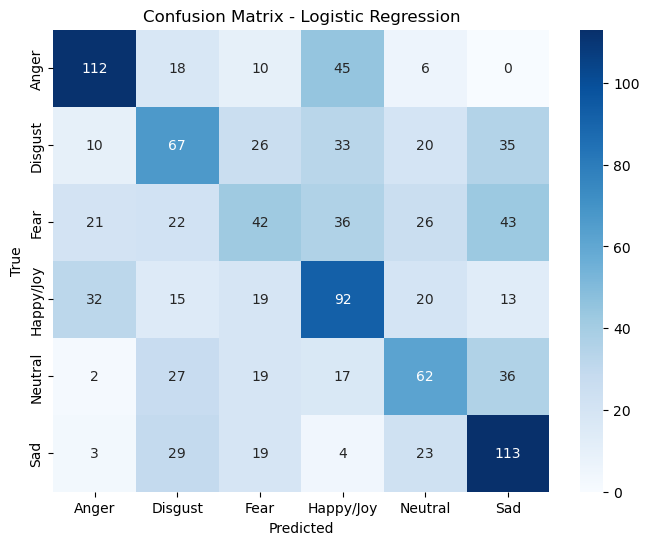


Training Support Vector Machine...


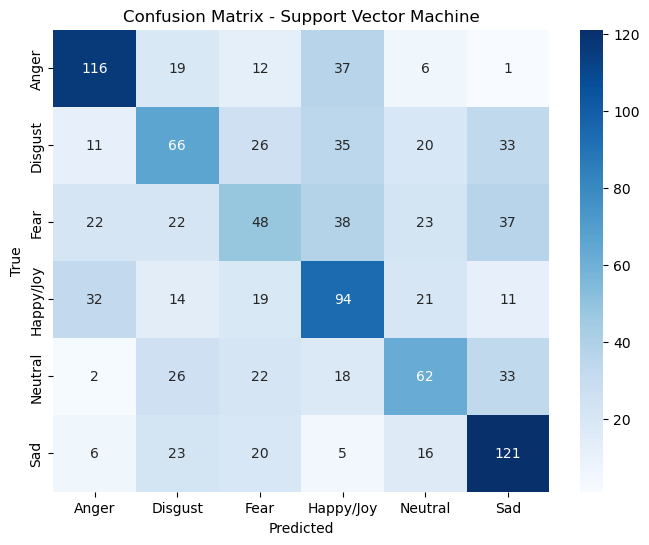


Training Neural Network...


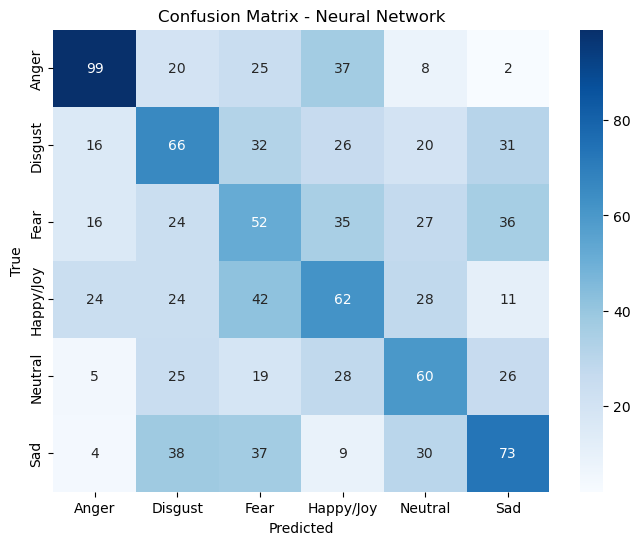


Training Naive Bayes...


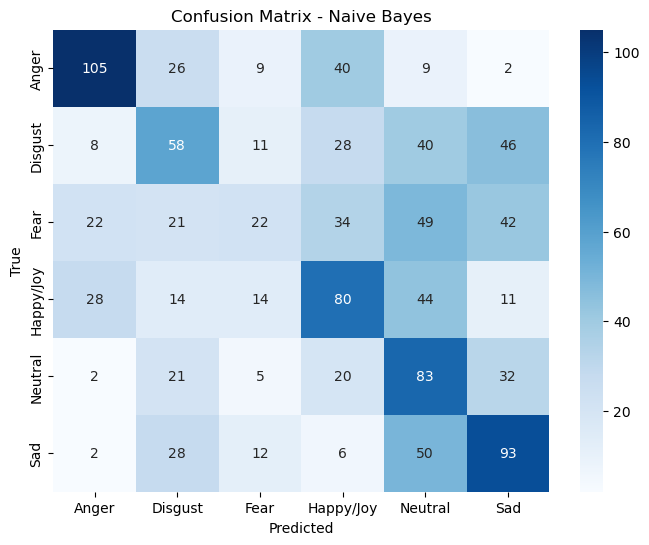


Model Evaluation Results:

K-Nearest Neighbors:
Accuracy: 0.3035
Precision: 0.3343
Recall: 0.3035
F1 Score: 0.2987

Logistic Regression:
Accuracy: 0.4369
Precision: 0.4311
Recall: 0.4369
F1 Score: 0.4308

Support Vector Machine:
Accuracy: 0.4539
Precision: 0.4465
Recall: 0.4539
F1 Score: 0.4474

Neural Network:
Accuracy: 0.3688
Precision: 0.3774
Recall: 0.3688
F1 Score: 0.3723

Naive Bayes:
Accuracy: 0.3948
Precision: 0.3980
Recall: 0.3948
F1 Score: 0.3842


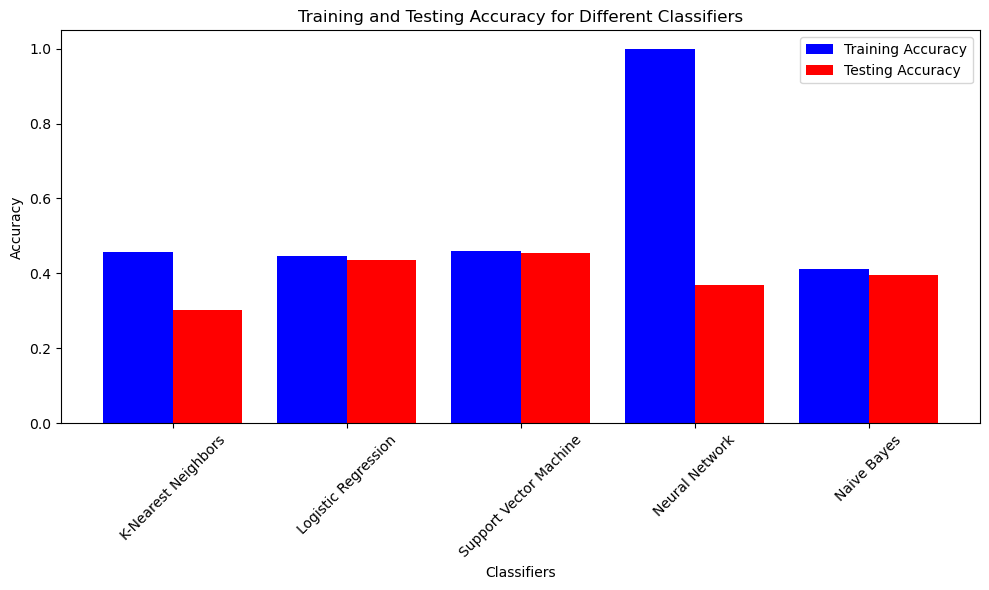


Training Accuracy Count:
K-Nearest Neighbors: 0.4573
Logistic Regression: 0.4477
Support Vector Machine: 0.4598
Neural Network: 0.9987
Naive Bayes: 0.4112


In [75]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy.stats import uniform
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

# Assuming train_mfcc_features, val_mfcc_features, and test_mfcc_features are already defined as numpy arrays
# and metadata for each split contains the 'Emotion' column.
def pad_or_truncate_mfcc(mfcc, n_mfcc=13, max_frames=150):  # Increased max_frames for higher frequency
    if mfcc.shape[1] < max_frames:
        padding = np.zeros((n_mfcc, max_frames - mfcc.shape[1]))
        mfcc = np.hstack((mfcc, padding))
    elif mfcc.shape[1] > max_frames:
        mfcc = mfcc[:, :max_frames]
    return mfcc

def prepare_data(mfcc_features, metadata, n_mfcc=13, max_frames=150):  # Increased max_frames
    X = []
    for mfcc in mfcc_features:
        mfcc = pad_or_truncate_mfcc(mfcc, n_mfcc, max_frames)
        X.append(mfcc.flatten())
    y = metadata['Emotion'].values
    return np.array(X), y

X_train, y_train = prepare_data(train_mfcc_features, train_metadata)
X_val, y_val = prepare_data(val_mfcc_features, val_metadata)
X_test, y_test = prepare_data(test_mfcc_features, test_metadata)

# Apply PCA for dimensionality reduction on features
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_val_scaled = scaler.transform(X_val_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Initialize classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)
naive_bayes = GaussianNB()
svm = SVC(kernel='linear')
neural_net = MLPClassifier(hidden_layer_sizes=(128,), max_iter=500)

# Define parameter distributions for RandomizedSearchCV
param_dist_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
param_dist_log_reg = {'C': uniform(0.1, 10)}  # C: regularization strength
param_dist_svm = {'C': uniform(0.1, 10)}  # C: regularization strength
param_dist_neural_net = {'hidden_layer_sizes': [(64,), (128,), (256,)],
                         'learning_rate_init': uniform(0.0001, 0.1)}
# For Naive Bayes, no tuning parameters needed

# Perform RandomizedSearchCV for each model (with 3-fold cross-validation)
knn_search = RandomizedSearchCV(knn, param_dist_knn, n_iter=10, cv=3, scoring='accuracy', random_state=42)
log_reg_search = RandomizedSearchCV(log_reg, param_dist_log_reg, n_iter=10, cv=3, scoring='accuracy', random_state=42)
svm_search = RandomizedSearchCV(svm, param_dist_svm, n_iter=10, cv=3, scoring='accuracy', random_state=42)
neural_net_search = RandomizedSearchCV(neural_net, param_dist_neural_net, n_iter=10, cv=3, scoring='accuracy', random_state=42)

# Perform RandomizedSearchCV for each model
best_models = {}

# Train and find best models using RandomizedSearchCV;
for model_name, model_search in zip(["K-Nearest Neighbors", "Logistic Regression", "Support Vector Machine", "Neural Network"],
                                    [knn_search, log_reg_search, svm_search, neural_net_search]):
    print(f"\nTuning hyperparameters for {model_name}...")
    model_search.fit(X_train_scaled, y_train)
    best_models[model_name] = model_search.best_estimator_

# Store Naive Bayes as is (no hyperparameters to tune)
best_models["Naive Bayes"] = naive_bayes

# Evaluate the models
results = {}
train_accuracies = {}
test_accuracies = {}

for model_name, model in best_models.items():
    print(f"\nTraining {model_name}...")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the training and test sets
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)
    
    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions, average='weighted')
    recall = recall_score(y_test, test_predictions, average='weighted')
    f1 = f1_score(y_test, test_predictions, average='weighted')
    conf_matrix = confusion_matrix(y_test, test_predictions)
    
    # Store results
    results[model_name] = {
        "Accuracy": test_accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix
    }
    
    # Store training accuracy
    train_accuracies[model_name] = train_accuracy
    test_accuracies[model_name] = test_accuracy

    # Display confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Step 7: Display evaluation results
print("\nModel Evaluation Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {value:.4f}")

# Step 8: Plot training and testing accuracy comparison
model_names = list(best_models.keys())
train_accuracy_values = list(train_accuracies.values())
test_accuracy_values = list(test_accuracies.values())

x = np.arange(len(model_names))  # The label locations

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the training accuracy
ax.bar(x - 0.2, train_accuracy_values, 0.4, label='Training Accuracy', color='b')

# Plot the testing accuracy
ax.bar(x + 0.2, test_accuracy_values, 0.4, label='Testing Accuracy', color='r')

# Add some labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy for Different Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Print the training accuracy count
print("\nTraining Accuracy Count:")
for model_name, accuracy in train_accuracies.items():
    print(f"{model_name}: {accuracy:.4f}")
